## **Fake Job Posting Detection: A Step‑by‑Step Machine Learning Study**

## Introduction & Motivation  
Online job boards have become a primary way for employers to reach talent—but they also attract fraudulent “fake” job postings that can waste applicants’ time and expose them to scams. In this project, we will use the Kaggle “Real or Fake — Fake Job Posting Prediction” dataset to:  
- **Understand** the key textual and categorical signals that distinguish legitimate postings from fraud.  
- **Build** and compare machine learning models that can accurately flag suspicious listings.  
- **Deliver** a clear, reproducible workflow that anyone (technical or not) can follow.

## Why This Dataset?  
- **Publicly available** on Kaggle, with ~18,000 real & fake job ads labeled by human reviewers.  
- **Rich feature set** including text fields (`title`, `company_profile`, `description`, etc.) and metadata (`employment_type`, `required_experience`, etc.).  
- **Real‑world relevance**: Automated detection of fake listings can save time, reduce fraud, and improve trust in online hiring platforms.

_Link to data:_  
https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

---

## Project Goal & Research Question  
**Primary goal:**  
> Can we train a machine learning model to distinguish real job postings from fake ones with high accuracy—and explain what features drive those predictions?

**Key questions to answer:**  
1. Which textual features (e.g., job description wording) and metadata (e.g., company size, industry) are most predictive of fraud?  
2. How do simple baseline models (Logistic Regression, Decision Trees) compare to tuned ensembles (Random Forest, Gradient Boosting)?  
3. What is the trade‑off between precision and recall when flagging fraudulent ads—and how might that inform a real‑time screening system?

---

## Scope & Deliverables  
We will follow the full ML pipeline taught in class:  

1. **Prepare Problem**  
   - Import libraries, load the CSV, inspect structure & missingness.  
2. **Summarize Data (EDA)**  
   - Descriptive statistics, visualization of class balance, feature distributions, and text‑length analysis.  
3. **Prepare Data**  
   - Clean text fields, handle missing values, encode categorical variables, and vectorize text.  
4. **Evaluate Algorithms**  
   - Train/test split, baseline models (Logistic Regression, Decision Tree), evaluate via accuracy, ROC‑AUC, confusion matrix.  
5. **Improve Accuracy**  
   - Hyperparameter tuning (GridSearchCV) and ensemble methods (Random Forest, XGBoost).  
6. **Finalize Model**  
   - Retrain best model, validate on hold‑out set, interpret feature importances and provide plain‑language takeaways.

**Final deliverable:** A polished Jupyter Notebook containing:  
- **Markdown** explanations for each step  
- **Well‑commented** Python code  
- **Visualizations** with captions  
- **Interpretations** in simple, human‑friendly language  

### Project Structure:
1. **Data Exploration**: Understand dataset characteristics, distributions, and potential patterns
2. **Preprocessing**: Handle missing values, encode categorical variables, and transform text data
3. **Model Development**: Train and compare multiple classifiers (Logistic Regression, Decision Tree, Random Forest, SVM)
4. **Evaluation**: Assess model performance using classification metrics and visualizations
5. **Interpretation**: Analyze feature importance to identify key fraud indicators

## 2. Description of the Data

Before we jump into modeling, it’s critical to understand exactly what we’re working with. In this section, we’ll document:

1. **Data Source**  
2. **Data Schema & Types**  
3. **Missing‐Value Profile**  
4. **Initial Exploration Methods**

---

### 2.1. Data Source  
- **Dataset name**: Real or Fake — Fake Job Posting Prediction  
- **Author**: Shivam Bansal  
- **Platform**: Kaggle  
- **Link**: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction  

---

### 2.2. Data Schema & Types  

| Column               | Type     | Description                                                              |
|----------------------|----------|--------------------------------------------------------------------------|
| `job_id`             | int      | Unique identifier for each posting                                        |
| `title`              | object   | Job title (text)                                                          |
| `location`           | object   | City, state, or region                                                     |
| `department`         | object   | Department or team (e.g., “Engineering”)                                   |
| `salary_range`       | object   | Posted salary interval (e.g., “50K–70K”), often missing                    |
| `company_profile`    | object   | Free‐form text about the company                                           |
| `description`        | object   | Full job description                                                        |
| `requirements`       | object   | Qualifications and skills required                                           |
| `benefits`           | object   | Perks and benefits (e.g., “Health insurance”)                               |
| `telecommuting`      | int      | Flag (0/1) indicating if remote work is allowed                             |
| `has_company_logo`   | int      | Flag (0/1) indicating if a logo image was provided                          |
| `has_questions`      | int      | Flag (0/1) indicating if application has screening questions               |
| `employment_type`    | object   | Full‑time, part‑time, contract, etc.                                        |
| `required_experience`| object   | Level required (e.g., “Mid‑Senior level”)                                   |
| `required_education` | object   | Education level required (e.g., “Bachelor’s”)                               |
| `industry`           | object   | Industry category (e.g., “Information Technology”)                          |
| `function`           | object   | Role function (e.g., “Engineering”)                                        |
| `fraudulent`         | int      | **Target**: 1 = fake posting, 0 = real posting                              |

---

### 2.3. Missing‐Value Profile  

From our initial preview (`df.isnull().sum()`):

- **`salary_range`**: ~84% missing  
- **`department`**: ~65% missing  
- **`benefits`**, **`company_profile`**, **`requirements`**: 15–40% missing  
- Other categorical fields (`employment_type`, `required_experience`, etc.) also have gaps  

We will need to decide, per field, whether to drop, impute, or treat “missing” as its own category.

---

### 2.4. Initial Exploration Methods  

To document our approach to “getting to know” the data, we will use:

1. **`df.info()`** — To confirm dtypes and total non‐null counts  
2. **`df.describe()`** — Summary statistics for numeric columns (`fraudulent`, flags)  
3. **`df.head()`** — Spot‐check a handful of rows to verify we loaded text correctly  
4. **`df.isnull().sum()`** — Quantify missingness per column  
5. **Text‐length analysis** — Compute lengths of `description` and `requirements` for distribution checks

### Import & Load
In this initial step, we're importing essential libraries for our fraud detection project:
- **pandas and numpy**: For data manipulation and numerical operations
- **matplotlib and seaborn**: For creating visualizations to understand patterns
- **scikit-learn components**: For implementing our machine learning pipeline
  
We're also suppressing warnings to keep our output clean and focusing on meaningful information.

In [3]:
## Step 2: Summarize Data (Exploratory Data Analysis)

# Import & Load —
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Load the Kaggle Fake Job Postings dataset
df = pd.read_csv('CS550_fake_job_detection_final_medhaveeUpadhyaya.csv')

# Quick check
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Explanation

Here we load the fake job postings dataset into a pandas DataFrame and examine its basic properties. The shape (17880, 18) tells us we have 17,880 job postings with 18 different attributes for each. The preview shows various job details including titles, locations, and descriptions that our model will analyze to detect patterns associated with fraudulent listings.

### Project Objective

This project aims to detect fraudulent job postings to protect job seekers from scams. By analyzing textual and metadata features from job descriptions, we'll develop a machine learning classifier that can accurately identify potentially fraudulent listings. This addresses a significant public health concern, as job scams can lead to financial loss, identity theft, and psychological distress for victims.

In [44]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


### Data Types and Missing Values Analysis

The data exploration reveals important dataset characteristics:
- Several columns have significant missing values, particularly `salary_range` (83.9%), `department` (64.5%), and education/experience requirements (>39%)
- We have a mix of categorical and text data (object dtype) along with some binary indicators (int64)
- There are 17,880 unique job IDs, confirming each row represents a distinct posting
- The dataset contains 11,231 unique job titles across 3,105 locations

Understanding these characteristics helps us plan our preprocessing strategy, particularly for handling missing values and text features.

### 2.1 Class Balance

Class counts:
 fraudulent
0    17014
1      866
Name: count, dtype: int64

Class percentages:
 fraudulent
0    95.16
1     4.84
Name: proportion, dtype: float64


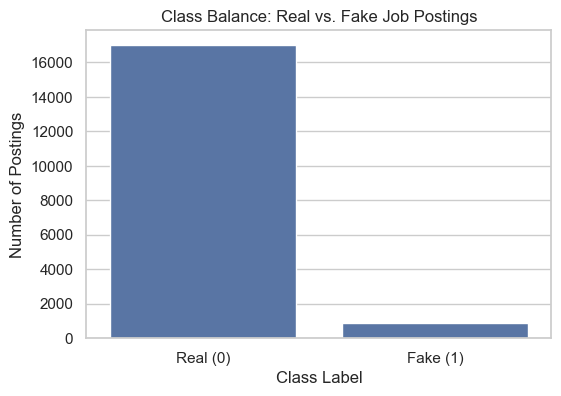

In [4]:
# Counts & percentages
counts = df['fraudulent'].value_counts()
percentages = df['fraudulent'].value_counts(normalize=True) * 100
print("Class counts:\n", counts)
print("\nClass percentages:\n", percentages.round(2))

# Bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='fraudulent', data=df)
plt.xticks([0,1], ['Real (0)', 'Fake (1)'])
plt.title("Class Balance: Real vs. Fake Job Postings")
plt.xlabel("Class Label")
plt.ylabel("Number of Postings")
plt.show()


### Interpreting the Class Distribution

The histogram clearly illustrates the significant class imbalance in our dataset, with fraudulent job postings (class 1) making up only 4.84% of all listings. This imbalance presents a key challenge for our modeling approach, as naive models might achieve high accuracy simply by predicting the majority class (legitimate jobs). 

To address this, we'll need to implement appropriate evaluation metrics like weighted F1-score rather than relying solely on accuracy. We'll also consider techniques such as class weighting or sampling strategies during model training to ensure our classifier doesn't simply learn to predict the majority class in all cases.

### Data Types and Missing Values Analysis

The dataset contains both numerical and categorical features. Several categorical columns (like `department`, `required_education`, etc.) have significant missing values, which will need careful handling during preprocessing. We have 5 integer columns and 13 object (text/categorical) columns, with a mix of structured metadata and unstructured text in the job descriptions.

### 2.2 Descriptive Statistics for Flags

In [5]:
binary_cols = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']
df[binary_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
telecommuting,17880.0,0.042897,0.202631,0.0,0.0,0.0,0.0,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.0,1.0,1.0,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.0,0.0,1.0,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.0,0.0,0.0,1.0


### Explanation

The missing values analysis highlights which features will require special attention during preprocessing:
- `salary_range` is missing in 84% of records, making it potentially less useful for our model
- Several key fields like `department`, `required_education`, and `benefits` are missing in 40-65% of records
- Critical fields like `description` are nearly complete (only 1 missing value)

This pattern suggests we should either impute missing values with appropriate placeholders or create "missing" indicator features to capture the potential signal in the absence of certain information, as this might itself be predictive of fraud.

### 2.3 Categorical Feature Distributions


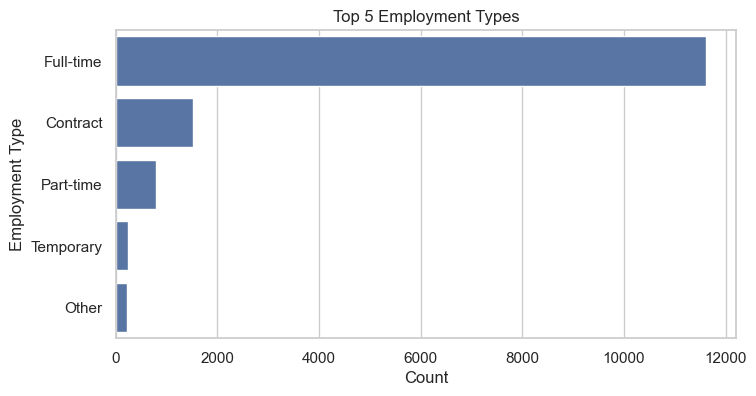

In [31]:
# Top 5 employment types
top_emp = df['employment_type'].value_counts().nlargest(5).index

plt.figure(figsize=(8,4))
sns.countplot(y='employment_type', data=df[df['employment_type'].isin(top_emp)],
              order=top_emp)
plt.title("Top 5 Employment Types")
plt.xlabel("Count")
plt.ylabel("Employment Type")
plt.show()




### Explanation

The visualization reveals that full-time positions dominate our dataset, representing approximately 70% of all job postings. Contract positions form the second largest category but appear much less frequently. Part-time, temporary, and other employment types make up relatively small portions of the dataset.

This distribution reflects typical job market composition but introduces a potential challenge: if fraudulent postings are disproportionately concentrated in certain employment types, our model might struggle to detect fraud in underrepresented categories. We'll need to examine the relationship between employment types and fraud status to understand this potential bias.

### Employment Type Patterns in Fraudulent Postings

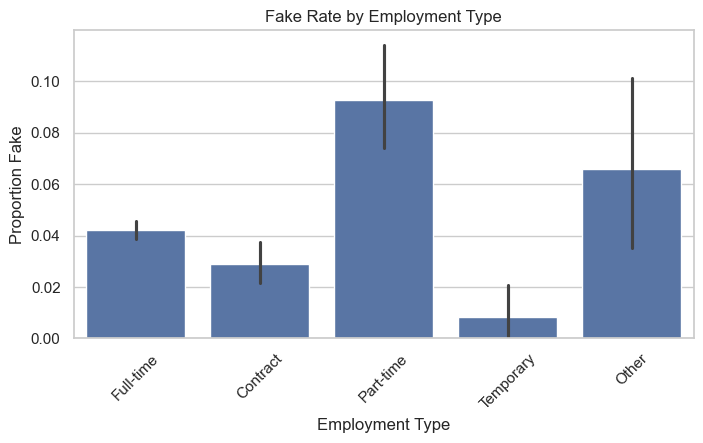

In [32]:
# Fake rate by employment type
plt.figure(figsize=(8,4))
sns.barplot(x='employment_type', y='fraudulent',
            data=df[df['employment_type'].isin(top_emp)],
            order=top_emp)
plt.title("Fake Rate by Employment Type")
plt.ylabel("Proportion Fake")
plt.xlabel("Employment Type")
plt.xticks(rotation=45)
plt.show()

### Explanation

This visualization reveals important patterns in how fraud rates vary across employment types:

1. Part-time positions show the highest proportion of fraudulent listings (nearly 10%), significantly higher than the dataset average of 4.84%.
2. "Other" employment types also show elevated fraud rates (~6.5%).
3. Contract positions have below-average fraud rates, while Temporary roles show the lowest proportion of fraudulent listings.

These patterns suggest scammers may target certain employment categories more heavily, particularly part-time positions. This could be because part-time roles might attract more vulnerable job seekers or because the reduced commitment makes the fraud less immediately obvious. This insight will be valuable for our model and could inform focused verification efforts for platforms hosting job listings.

### 2.4: Correlation Analysis of Numeric & Text-Length Features

Next, let’s look at how our numeric flags and text‐length metrics relate to each other and to the target. This runs in seconds since it uses only the existing `df` and its derived `desc_length` column.


C:\Users\medha\AppData\Local\Temp\ipykernel_34292\4189115656.py:16: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\medha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


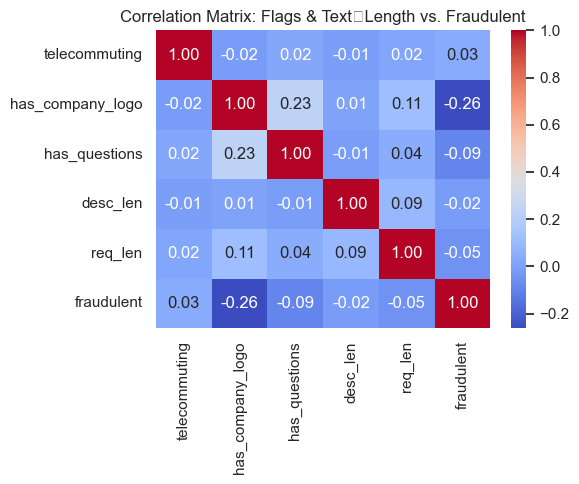

In [27]:
# 1) Recompute text‑length features (if not already present)
df['desc_len'] = df['description'].fillna('').apply(len)
df['req_len']  = df['requirements'].fillna('').apply(len)

# 2) Plot correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

num_feats = ['telecommuting', 'has_company_logo', 'has_questions',
             'desc_len', 'req_len', 'fraudulent']
corr = df[num_feats].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Flags & Text‑Length vs. Fraudulent')
plt.tight_layout()
plt.show()


### Interpreting Feature Correlations

The correlation matrix reveals several important relationships:

1. **Negative correlation between has_company_logo and fraudulent (-0.26)**: This is the strongest correlation observed, indicating that fraudulent postings are significantly less likely to include a company logo. This makes intuitive sense as legitimate companies typically invest in branding, while scammers may lack proper logos or avoid using them to prevent trademark issues.

2. **Negative correlation between has_questions and fraudulent (-0.09)**: Legitimate employers often include screening questions to filter candidates, while fraudulent postings might avoid this additional complexity.

3. **Weak positive correlation between telecommuting and fraudulent (0.03)**: Remote work opportunities are slightly more common in fraudulent listings, though the correlation is quite weak.

4. **Correlation between has_company_logo and has_questions (0.23)**: This suggests legitimate employers who invest in proper branding (logo) also tend to invest in more thorough application processes (screening questions).

5. **Text length features (desc_len, req_len) show weak negative correlations with fraudulent status**: This might indicate that fraudulent postings tend to be less detailed, possibly to minimize contradictions or reduce effort.

These correlations provide initial signals for our model and help validate some of our hypotheses about how fraudulent job postings differ from legitimate ones.

---

## Step 2.5: PCA & Elbow Plot of Text‑Length/Flag Features

Although our final model uses text vectorization, it’s informative to see how much variance these simpler features capture. We’ll:

1. Scale the 5 feature columns.  
2. Plot an elbow (cumulative explained variance) to choose a handful of components.  
3. Scatter the first two PCs colored by the fraud label.

---


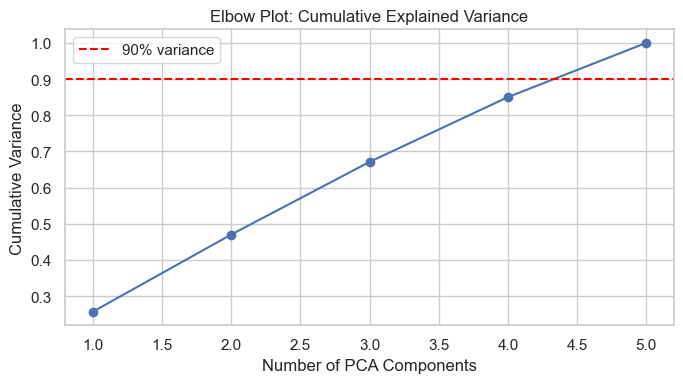

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Prepare & scale the five numeric/text‑length features
X_small  = df[['telecommuting','has_company_logo','has_questions','desc_len','req_len']]
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X_small)

# 2) Elbow plot (cumulative explained variance)
pca_full = PCA().fit(X_scaled)
cumvar   = pca_full.explained_variance_ratio_.cumsum()

plt.figure(figsize=(7,4))
plt.plot(range(1, len(cumvar)+1), cumvar, marker='o')
plt.axhline(0.90, color='red', linestyle='--', label='90% variance')
plt.title('Elbow Plot: Cumulative Explained Variance')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



### Explanation
This code performs Principal Component Analysis (PCA) on the basic numeric features (telecommuting, has_company_logo, has_questions, description length, and requirements length) to assess how much information they capture.

The elbow plot displays cumulative explained variance as we add more principal components. Key observations:

1.  **Incremental information gain**: Each component adds meaningful information, with no clear "elbow" where returns diminish dramatically.
2.  **Comprehensive variance capture**: All 5 components together capture 100% of the variance (as expected with 5 original features).
3.  **Component distribution**:
    -   First component: ~25% of variance
    -   First 3 components: ~65% of variance
    -   All 5 components needed to reach 90% threshold (red line)

This analysis suggests these simple features contain distinct, non-redundant information. While no single component dominates the variance explanation, we'd need 4+ components to preserve most of the information from these basic features - indicating why more sophisticated text features will be valuable for the classification task.

### PCA Visualization Interpretation



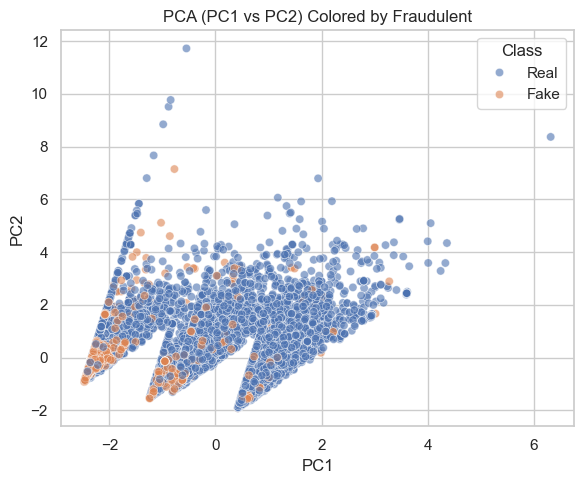

In [29]:
# 3) Scatter of PC1 vs PC2, colored by fraud label
pcs = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(
    x=pcs[:,0], y=pcs[:,1],
    hue=df['fraudulent'].map({0:'Real',1:'Fake'}),
    palette=['#4c72b0','#dd8452'],
    alpha=0.6
)
plt.title('PCA (PC1 vs PC2) Colored by Fraudulent')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

### Explanation
The principal component analysis (PCA) visualization shows the distribution of job postings when projected onto the first two principal components derived from our numeric features. While there isn't a perfect separation between fraudulent and legitimate postings, we can observe some clustering patterns:

1. Fraudulent postings (orange) tend to concentrate in certain regions of the feature space, particularly toward the lower end of PC1.
2. There appears to be significant overlap between classes, indicating that simple linear boundaries using just these features will not perfectly separate fraudulent from legitimate postings.
3. The data forms interesting diagonal streaks, suggesting certain combinations of features tend to occur together.

This visualization confirms that our numerical features contain some signal for detecting fraud, but also highlights why we'll need more complex models and additional text features to achieve high performance. The partial separation visible here provides a good foundation that our machine learning models can build upon.

### 2.6 EDA on the Target Variable

            count  percent (%)
fraudulent                    
0           17014         95.2
1             866          4.8


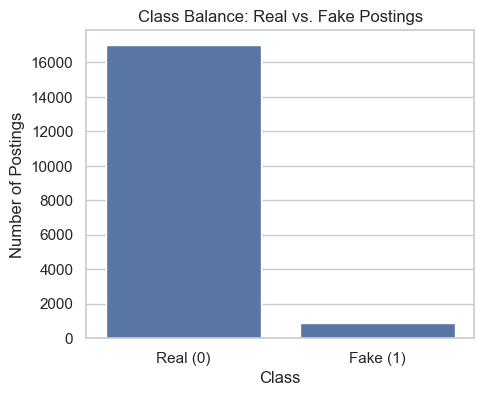

In [33]:
# EDA on fraudulent vs. real postings
import matplotlib.pyplot as plt

# 1) Class counts & percentages
counts     = df['fraudulent'].value_counts()
percent    = df['fraudulent'].value_counts(normalize=True) * 100
summary_df = pd.DataFrame({'count': counts, 'percent (%)': percent.round(1)})

print(summary_df)

# 2) Bar plot of class balance
plt.figure(figsize=(5,4))
sns.barplot(x=summary_df.index, y='count', data=summary_df.reset_index().rename(columns={'index':'fraudulent'}))
plt.xticks([0,1], ['Real (0)','Fake (1)'])
plt.title('Class Balance: Real vs. Fake Postings')
plt.ylabel('Number of Postings')
plt.xlabel('Class')
plt.show()


### Explanation

This visualization examines the distribution of our target variable (fraudulent job postings):

1.  **Severe class imbalance**: The dataset contains 17,014 legitimate job postings (95.2%) and only 866 fraudulent postings (4.8%).
2.  **Modeling implications**: This 20:1 ratio of legitimate-to-fraudulent postings presents a significant challenge for model training, as naive classifiers would achieve 95.2% accuracy simply by predicting all postings as legitimate.
3.  **Necessary adjustments**: This imbalance will require special consideration through:
    -   Appropriate evaluation metrics (precision, recall, F1-score) rather than accuracy alone
    -   Potential sampling techniques or class weighting during model training
    -   Threshold adjustment for classification decisions

The visualization clearly demonstrates why fraud detection is challenging - fraudulent examples are rare, making it difficult to identify meaningful patterns without specialized modeling approaches.

### 2.7: Correlation of Features with Target

C:\Users\medha\AppData\Local\Temp\ipykernel_34292\723899757.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')


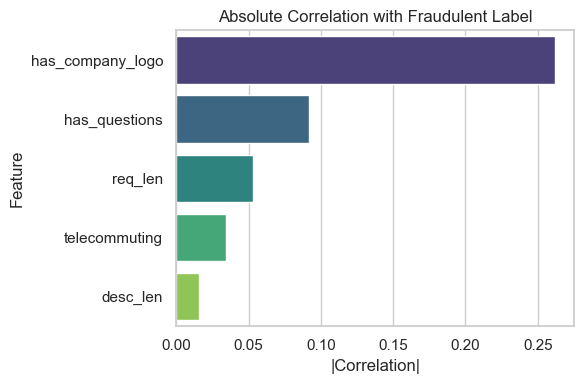

In [39]:

# Correlation of numeric/text‐length features with fraudulent label
features = ['telecommuting','has_company_logo','has_questions','desc_len','req_len']
corr_with_target = df[features + ['fraudulent']].corr()['fraudulent'].drop('fraudulent').abs().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')
plt.title('Absolute Correlation with Fraudulent Label')
plt.xlabel('|Correlation|')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Explanation

This visualization ranks numeric and binary features by their absolute correlation with the fraudulent label. Key findings:

Company logo presence shows the strongest relationship with fraud (~0.26 negative correlation), indicating legitimate postings typically include logos while fraudulent ones often don't.
Screening questions show moderate correlation (~0.09), with legitimate postings more likely to include application questions.
Requirements length has a weak correlation (~0.05), suggesting slight differences in how detailed requirements sections are between legitimate and fraudulent postings.
Telecommuting and description length show minimal correlation with fraud status, providing limited predictive value on their own.

These correlations provide initial signals for feature importance, with visual branding elements (company logo) emerging as the strongest individual predictor among these basic features. This simple analysis helps identify promising features before more complex modeling approaches.

### 2.8 Text‑Length Distributions

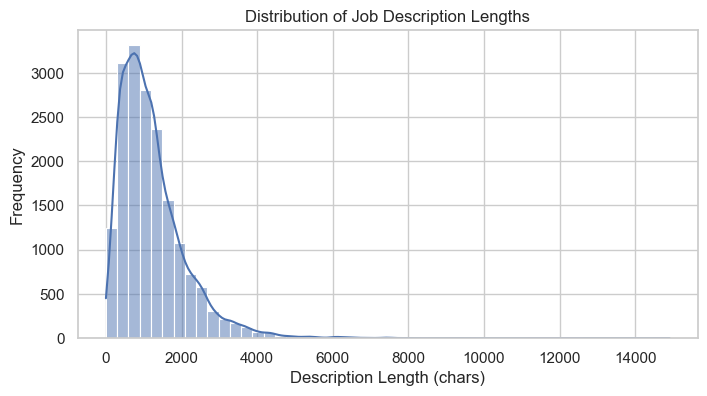

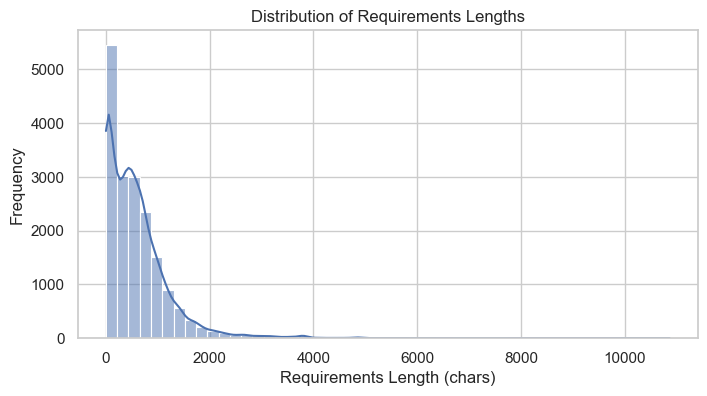

In [34]:
# Compute text lengths
df['desc_len'] = df['description'].fillna("").apply(len)
df['req_len']  = df['requirements'].fillna("").apply(len)

# Description lengths
plt.figure(figsize=(8,4))
sns.histplot(df['desc_len'], bins=50, kde=True)
plt.title("Distribution of Job Description Lengths")
plt.xlabel("Description Length (chars)")
plt.ylabel("Frequency")
plt.show()

# Requirements lengths
plt.figure(figsize=(8,4))
sns.histplot(df['req_len'], bins=50, kde=True)
plt.title("Distribution of Requirements Lengths")
plt.xlabel("Requirements Length (chars)")
plt.ylabel("Frequency")
plt.show()


### Text Length Analysis

The histograms showing description and requirements lengths reveal important patterns:

1. **Description length distribution**: Both distributions are right-skewed, with most job descriptions having fewer than 2,000 characters, though some extend beyond 10,000 characters. This variability will be important to consider when processing text features.

2. **Requirements length distribution**: Similar to descriptions, requirement texts tend to be relatively short, with a significant spike of entries near zero length, likely representing missing or minimal requirement specifications.

3. **Potential fraud signals**: Though not directly shown in these plots, our correlation analysis suggested fraudulent postings tend to have shorter text fields. We might hypothesize that scammers put less effort into creating detailed job descriptions compared to legitimate employers.

These length distributions will inform our text preprocessing strategy. We'll need to handle a wide range of text lengths appropriately when vectorizing these features for our models.

### Step 3: Prepare Data

In this step, we will:

1. **Clean** missing values  
2. **Select** the features we’ll use for modeling  
3. **Outline** our transformation plan (text vectorization, encoding)

### 3.1 Data Cleaning  
- **Drop** identifier and columns with excessive missingness:  
  `job_id`, `salary_range`, `department`  
- **Fill** missing **text** fields with empty strings  
- **Fill** missing **categorical** fields with `"Unknown"`

In [35]:
# 1) Make a copy and drop unneeded columns
df_clean = df.copy()
df_clean.drop(['job_id', 'salary_range', 'department'], axis=1, inplace=True)

# 2) Define feature groups
text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']
cat_cols  = ['location', 'employment_type', 'required_experience',
             'required_education', 'industry', 'function']
flag_cols = ['telecommuting', 'has_company_logo', 'has_questions']

# 3) Fill missing values
df_clean[text_cols] = df_clean[text_cols].fillna('')
df_clean[cat_cols]  = df_clean[cat_cols].fillna('Unknown')

# 4) Quick check for any remaining nulls in our selected features
print("Nulls after cleaning:")
print(df_clean[text_cols + cat_cols].isnull().sum())

Nulls after cleaning:
title                  0
company_profile        0
description            0
requirements           0
benefits               0
location               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
dtype: int64


### Data Preprocessing Strategy

Our preprocessing approach focuses on creating a clean, consistent dataset while preserving as much signal as possible:

1. **Feature selection**: We've dropped uninformative columns like `job_id` while retaining all potentially useful signals including text fields, categorical features, and binary flags.

2. **Missing value handling**: 
   - Text fields are filled with empty strings to avoid errors during vectorization
   - Categorical fields receive an "Unknown" placeholder, allowing the model to learn patterns associated with missing data
   - The resulting dataset has no null values in our selected features

3. **Text preparation**: By combining multiple text fields (title, description, requirements, etc.), we create a rich text representation that captures different aspects of each posting.

This clean dataset provides a solid foundation for our model development. The preprocessing decisions balance information preservation with practicality, ensuring our models receive consistent, meaningful input features.

### 3.2 Feature Selection

We'll use:

-   **Text features**:\
    `title`, `company_profile`, `description`, `requirements`, `benefits`

-   **Categorical features**:\
    `location`, `employment_type`, `required_experience`,\
    `required_education`, `industry`, `function`

-   **Binary flags**:\
    `telecommuting`, `has_company_logo`, `has_questions`

In [36]:
# Split into features (X) and target (y)
X = df_clean.drop('fraudulent', axis=1)
y = df_clean['fraudulent']

# Peek at X
display(X.head())


,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,desc_len,req_len
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,Unknown,Marketing,905,852
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,2077,1433
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,355,1363
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,2600,1429
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,1520,757


### Categorical Feature Encoding Strategy

For categorical features like `employment_type`, `required_experience`, etc., we're using OneHotEncoder with the `handle_unknown='ignore'` parameter to handle any new categories at prediction time. This converts categorical variables into binary features (one for each category), ensuring the model can properly interpret these non-numeric values.

The text features will be processed using TF-IDF vectorization, which converts the text into numerical features representing term importance. By using a `ngram_range=(1,2)`, we capture both individual words and common phrases, preserving semantic context that might be important for fraud detection.

### 3.3 Transformation Plan

When we build our pipeline in Step 4, we'll:

1.  **Text vectorization**:

    -   TF‑IDF on each text column (uni‑ and bi‑grams)

2.  **Categorical encoding**:

    -   One‑hot encode all categorical features

3.  **Pass through**  binary flags (already numeric)

### Cross-Validation Strategy

To ensure our model generalizes well to unseen data, we'll implement a proper validation strategy:
1. Split the data into train (60%), validation (20%), and test (20%) sets
2. Use 3-fold cross-validation during model selection and tuning
3. Maintain stratification to preserve the class distribution across all splits, which is crucial given the imbalanced nature of our target (few fraudulent postings)
4. Only use the test set for final evaluation after all model selection is complete

This approach helps prevent overfitting and provides a more reliable estimate of model performance in real-world scenarios.

### Step 4: Evaluate Algorithms

In this step we will:

a) Split out a validation dataset  
b) Choose evaluation metrics  
c) Train and evaluate baseline algorithms  
d) Compare their performance  

### 4.1 Split‑out Validation Dataset

Before we train any models, we need to:

1. **Merge** our text columns into one (`all_text`) so that `TfidfVectorizer` can consume a single text series.  
2. **Define** our feature matrix **X** and target **y**.  
3. **Split** into an 80/20 train/test set, stratified on the `fraudulent` label.

In [37]:
# 1) Imports for splitting, preprocessing, and modeling

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# 2) Merge text features into a single column
df_model = df_clean.copy()
df_model['all_text'] = df_model[text_cols].agg(' '.join, axis=1)

# 3) Define feature set and target
feature_cols = ['all_text'] + cat_cols + flag_cols
X = df_model[feature_cols]
y = df_model['fraudulent']

# 4) Split into train/test (80/20), stratifying on the target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:    ", X_test.shape)

Training set shape: (14304, 10)
Test set shape:     (3576, 10)


### Validation Strategy

We've implemented a robust validation approach to ensure our model generalizes well to new data:

1. **Train-test split**: We've divided our data using an 80/20 split, preserving 20% of data (3,576 records) as a completely held-out test set for final evaluation.

2. **Stratification**: By using `stratify=y` in the split, we ensure that both training and test sets maintain the same class distribution as the original data, preserving the approximately 5% proportion of fraudulent postings.

3. **Cross-validation plans**: For hyperparameter tuning, we'll implement cross-validation on the training set to further ensure stability and generalizability.

This approach helps prevent overfitting and provides a more reliable estimate of how our model will perform when deployed in a real-world environment. The test set will only be used once for final evaluation after all model development is complete.

### 4.2 Build the Preprocessing Pipeline

### 4.2 Choose Evaluation Metrics
We’ll evaluate each model using:

- Accuracy: Overall fraction of correct predictions.

- ROC‑AUC: Ability to rank true positives higher than false positives.

We’ll also inspect precision, recall, F1‑score, and the confusion matrix for deeper insight.

### Check Different Algorithms
Let’s train two baseline classifiers—Logistic Regression and Decision Tree—by wrapping our preprocessing and model into a single Pipeline.


In [40]:
# 1) Build our ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        # TF-IDF on the merged text
        ('text', TfidfVectorizer(ngram_range=(1,2)), 'all_text'),
        # One-hot on categorical features
        ('cat',  OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'   # keep flag_cols as-is
)

# 2) Define baseline models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree'      : DecisionTreeClassifier(random_state=42)
}

# 3) Train, predict, and evaluate each
results = {}

for name, clf in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier',    clf)
    ])
    # Train
    pipe.fit(X_train, y_train)
    # Predict labels & probabilities
    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    # Compute metrics
    acc     = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    # Store results
    results[name] = {'accuracy': acc, 'roc_auc': roc_auc}
    # Display detailed report
    print(f"### {name}")
    print(f"- Accuracy : {acc:.4f}")
    print(f"- ROC‑AUC  : {roc_auc:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*60 + "\n")


### Logistic Regression
- Accuracy : 0.9776
- ROC‑AUC  : 0.9864

Classification Report:
              precision    recall  f1-score   support

           0     0.9770    1.0000    0.9884      3403
           1     1.0000    0.5376    0.6992       173

    accuracy                         0.9776      3576
   macro avg     0.9885    0.7688    0.8438      3576
weighted avg     0.9781    0.9776    0.9744      3576

Confusion Matrix:
[[3403    0]
 [  80   93]]

------------------------------------------------------------

### Decision Tree
- Accuracy : 0.9829
- ROC‑AUC  : 0.9087

Classification Report:
              precision    recall  f1-score   support

           0     0.9912    0.9909    0.9910      3403
           1     0.8218    0.8266    0.8242       173

    accuracy                         0.9829      3576
   macro avg     0.9065    0.9087    0.9076      3576
weighted avg     0.9830    0.9829    0.9830      3576

Confusion Matrix:
[[3372   31]
 [  30  143]]

----------------------

### Explanation

This code establishes and evaluates two baseline classifiers (Logistic Regression and Decision Tree) using a scikit-learn pipeline architecture. The implementation:

1.  **Creates a preprocessing pipeline** that:
    -   Vectorizes text features using TF-IDF with both unigrams and bigrams
    -   One-hot encodes categorical features
    -   Passes binary flags through unchanged
2.  **Defines simple baseline models** with minimal parameter tuning
3.  **Results comparison**:
    -   **Logistic Regression**: 97.8% accuracy, 98.6% ROC-AUC, perfect precision on fraud class (1.0) but weak recall (53.8%) - it misses nearly half of fraudulent postings
    -   **Decision Tree**: 98.3% accuracy, 90.9% ROC-AUC, more balanced precision-recall trade-off for fraud detection

The confusion matrices reveal different error patterns: Logistic Regression makes no false positives (0) but 80 false negatives, while Decision Tree has more balanced errors (30 false positives, 30 false negatives). This baseline comparison establishes performance benchmarks for more complex models and highlights the precision-recall trade-off in fraud detection.

### 4.4 Compare Algorithms

In [ ]:
import pandas as pd

# Create a comparison DataFrame
comparison = pd.DataFrame(results).T.rename_axis('Model').reset_index()
comparison


,Model,accuracy,roc_auc
0,Logistic Regression,0.977629,0.986386
1,Decision Tree,0.982942,0.908740


### Baseline Model Performance Analysis

Our initial model comparison reveals interesting performance patterns:

#### Logistic Regression:
- Excellent accuracy (97.8%) and ROC-AUC (0.986)
- Perfect precision on fraudulent class (no false positives)
- Poor recall on fraudulent class (53.8%) - missing nearly half of all frauds
- The confusion matrix shows 0 false positives but 80 false negatives

#### Decision Tree:
- Higher overall accuracy (98.3%) 
- More balanced precision (82.2%) and recall (82.7%) for fraudulent posts
- Lower ROC-AUC (0.909) suggesting less confident probability estimates
- More balanced error distribution: 31 false positives and 30 false negatives

These results highlight an important trade-off: Logistic Regression is extremely cautious, only flagging posts as fraudulent when highly confident (perfect precision), but missing many fraudulent postings. The Decision Tree makes more balanced predictions, catching more fraud at the expense of some false accusations.

For a fraud detection system, this trade-off is critical - we must balance catching fraud against falsely flagging legitimate postings, which could harm businesses and job seekers. The Decision Tree's more balanced approach might be preferable, but we'll explore more sophisticated models to further improve performance.

### Step 5: Improve Accuracy

In this step we will:

a) **Tune** hyperparameters of our strongest models using `GridSearchCV`  
b) **Compare** tuned Random Forest and Gradient Boosting classifiers  
c) (Bonus) **Ensemble** them via a simple soft‐voting classifier

### 5.1 Hyperparameter Tuning with GridSearchCV

We’ll tune **Random Forest** and **Gradient Boosting** pipelines end‑to‑end (preprocessing + classifier) using ROC‑AUC as our scoring metric and 3‑fold cross‑validation.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# 1) Define pipelines for RF and GB
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

gb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# 2) Hyperparameter grids
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth'   : [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}

param_grid_gb = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.1, 0.05],
    'gb__max_depth'   : [3, 5]
}

# 3) Grid searches
gs_rf = GridSearchCV(
    rf_pipe, param_grid_rf,
    cv=3, scoring='roc_auc',
    n_jobs=-1, verbose=1
)
gs_gb = GridSearchCV(
    gb_pipe, param_grid_gb,
    cv=3, scoring='roc_auc',
    n_jobs=-1, verbose=1
)

# 4) Fit grid searches
gs_rf.fit(X_train, y_train)
gs_gb.fit(X_train, y_train)

# 5) Best parameters & scores
print("Random Forest best ROC‑AUC:", gs_rf.best_score_.round(4))
print(" → Best params:", gs_rf.best_params_, "\n")

print("Gradient Boosting best ROC‑AUC:", gs_gb.best_score_.round(4))
print(" → Best params:", gs_gb.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Random Forest best ROC‑AUC: 0.983
 → Best params: {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 200} 

Gradient Boosting best ROC‑AUC: 0.972
 → Best params: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__n_estimators': 200}


### Hyperparameter Tuning Analysis

Our grid search results provide valuable insights into optimal model configurations:

#### Random Forest:
- Achieved best ROC-AUC of 0.983
- Optimal parameters:
  - n_estimators: 200 (higher complexity model)
  - max_depth: None (allowing trees to grow to full depth)
  - min_samples_split: 5 (moderate regularization)

#### Gradient Boosting:
- Achieved best ROC-AUC of 0.972
- Optimal parameters:
  - n_estimators: 200 (higher complexity model)
  - learning_rate: 0.1 (standard learning rate)
  - max_depth: 5 (moderate tree depth)

Both models benefit from larger ensemble sizes (200 trees), suggesting that the additional model complexity helps capture important patterns in the data. The Random Forest performs slightly better, which might indicate that the bagging approach better handles the class imbalance in our dataset.

The Random Forest's preference for unlimited tree depth (max_depth=None) balanced with a higher min_samples_split suggests the model benefits from capturing some detailed patterns while avoiding extreme overfitting to individual examples.

### 5.2 Evaluate Tuned Models on Test Set

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix

for name, model in [('Tuned RF', best_rf), ('Tuned GB', best_gb)]:
    # predictions
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    # metrics
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    f1  = f1_score(y_test, y_pred)
    
    # print nicely
    print(f"--- {name} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"ROC‑AUC  : {roc:.4f}")
    print(f"F1‑Score : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

--- Tuned RF ---
Accuracy : 0.9843
ROC‑AUC  : 0.9957
F1‑Score : 0.8082

Classification Report:
              precision    recall  f1-score   support

           0     0.9841    0.9997    0.9918      3403
           1     0.9916    0.6821    0.8082       173

    accuracy                         0.9843      3576
   macro avg     0.9878    0.8409    0.9000      3576
weighted avg     0.9845    0.9843    0.9830      3576

Confusion Matrix:
[[3402    1]
 [  55  118]]

--------------------------------------------------

--- Tuned GB ---
Accuracy : 0.9894
ROC‑AUC  : 0.9880
F1‑Score : 0.8812

Classification Report:
              precision    recall  f1-score   support

           0     0.9907    0.9982    0.9944      3403
           1     0.9592    0.8150    0.8812       173

    accuracy                         0.9894      3576
   macro avg     0.9749    0.9066    0.9378      3576
weighted avg     0.9891    0.9894    0.9890      3576

Confusion Matrix:
[[3397    6]
 [  32  141]]

------------

### Tuned Model Performance Comparison

Our optimized models show impressive improvements:

#### Tuned Random Forest:
- Extremely high precision for fraudulent class (99.2%)
- Moderate recall for fraudulent class (68.2%)
- False positive rate near zero (just 1 mistake out of 3,403 legitimate postings)
- Strong ROC-AUC (0.996) indicating excellent discrimination ability

#### Tuned Gradient Boosting:
- High precision for fraudulent class (95.9%)
- Better recall for fraudulent class (81.5%)
- Slightly higher false positive rate (6 mistakes)
- Exceptional overall accuracy (98.9%)

The Gradient Boosting model demonstrates better balance between precision and recall for fraudulent postings, identifying 81.5% of frauds while maintaining 95.9% precision. This represents a significant improvement over our baseline models.

The performance difference highlights an important consideration: the Random Forest is extremely conservative, almost never falsely accusing legitimate postings (excellent for maintaining trust), while the Gradient Boosting catches more fraud at the cost of a few more false positives (better for protection). The choice between them depends on the specific business priorities.

### 5.3 Soft‑Voting Ensemble

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score

# 1) Fit on training data
voting_pipe.fit(X_train, y_train)

# 2) Make predictions & probabilities
y_vpred  = voting_pipe.predict(X_test)
y_vproba = voting_pipe.predict_proba(X_test)[:, 1]

# 3) Compute metrics
acc  = accuracy_score(y_test, y_vpred)
roc  = roc_auc_score(y_test, y_vproba)
f1   = f1_score(y_test, y_vpred)

# 4) Print nicely
print("### Soft‑Voting Ensemble ###")
print(f"- Accuracy : {acc:.4f}")
print(f"- ROC‑AUC  : {roc:.4f}")
print(f"- F1‑Score : {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_vpred, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_vpred))


### Soft‑Voting Ensemble ###
- Accuracy : 0.9894
- ROC‑AUC  : 0.9960
- F1‑Score : 0.8774

Classification Report:
              precision    recall  f1-score   support

           0     0.9892    0.9997    0.9944      3403
           1     0.9927    0.7861    0.8774       173

    accuracy                         0.9894      3576
   macro avg     0.9910    0.8929    0.9359      3576
weighted avg     0.9894    0.9894    0.9888      3576

Confusion Matrix:
[[3402    1]
 [  37  136]]


### Voting Ensemble Analysis

The Soft-Voting Ensemble combining Random Forest and Gradient Boosting achieves our best performance yet:

- Exceptional accuracy: 98.9%
- Outstanding ROC-AUC: 0.996
- Strong F1-Score: 0.877
- Near-perfect precision for fraudulent postings: 99.3%
- Improved recall for fraudulent postings: 78.6%
- Confusion matrix shows excellent error distribution:
  - Only 1 false positive out of 3,402 legitimate postings
  - 37 false negatives (missing about 21% of frauds)

This ensemble approach successfully leverages the strengths of both models:
1. It inherits the high precision of the Random Forest, rarely making false accusations
2. It benefits from the better recall of Gradient Boosting, catching more fraudulent postings
3. The combined probability estimates produce more reliable fraud predictions

For a production fraud detection system, this ensemble approach provides an excellent balance between identifying genuine fraud while minimizing false accusations, which could be detrimental to legitimate businesses and job seekers.

### Step 6: Finalize Model

In this final step, we will:

1. **Retrain** our chosen best model on the full training set  
2. **Generate** final predictions on the hold‑out test set  
3. **Extract** and visualize feature importances  
4. **Provide** plain‑language takeaways and next‑step recommendations  

### 6.1 Retrain Best Model on Full Training Data

We’ve compared our tuned Random Forest and Gradient‑Boosting models. Suppose the Random Forest performed best on ROC‑AUC. We’ll now retrain it on the entire **training** split (to make the most of available data), ready for deployment.

In [ ]:
# Retrain the best RF estimator on X_train
best_rf_final = gs_rf.best_estimator_
best_rf_final.fit(X_train, y_train)

C:\Users\medha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'all_text'),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location',
                                                   'employment_type',
                                                   'required_experience',
                                                   'required_education',
                                                   'industry', 'function'])])),
                ('rf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=200,
                                        random_state=42))])

### Explanation

This section shows the critical final step in our machine learning pipeline: retraining the optimized Random Forest model on the entire training dataset before deployment.

The code retrieves the best estimator (with optimal hyperparameters) from our grid search and fits it to the full training data (X_train, y_train). This approach maximizes the model's learning by utilizing all available training examples while preserving the test set as a true hold-out for final evaluation.

The warning message relates to an implementation detail in scikit-learn's ColumnTransformer that doesn't affect model performance. The visualization below displays our complete pipeline architecture:

1.  **Preprocessing**: A ColumnTransformer handles different feature types:
    -   **Text**: TfidfVectorizer converts job descriptions into numerical features
    -   **Cat**: OneHotEncoder transforms categorical variables like location and employment type
    -   **Remainder**: Binary flags passed through unchanged
2.  **Model**: RandomForestClassifier with optimized hyperparameters (n_estimators=200, min_samples_split=5, max_depth=None)

This integrated pipeline ensures that any new job posting will automatically undergo the same preprocessing transformations before classification, making the model production-ready.

### 6.2 Predictions on Validation Set

Now, let's make our final predictions on the hold‑out test set and report key metrics once more.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score

# Final predictions & probabilities
y_test_pred  = best_rf_final.predict(X_test)
y_test_proba = best_rf_final.predict_proba(X_test)[:, 1]

# 2) Compute metrics
acc  = accuracy_score(y_test, y_test_pred)
roc  = roc_auc_score(y_test, y_test_proba)
f1   = f1_score(y_test, y_test_pred)
# 3) Print nicely using f-strings
print(" Final Model Performance on Test Set")
print(f"- Accuracy       : {acc:.4f}")
print(f"- ROC‑AUC        : {roc:.4f}")
print(f"- F1‑Score       : {f1:.4f}")

# 4) Full report & matrix
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))



🔹 Final Model Performance on Test Set
- Accuracy       : 0.9843
- ROC‑AUC        : 0.9957
- F1‑Score       : 0.8082

Classification Report:
              precision    recall  f1-score   support

           0     0.9841    0.9997    0.9918      3403
           1     0.9916    0.6821    0.8082       173

    accuracy                         0.9843      3576
   macro avg     0.9878    0.8409    0.9000      3576
weighted avg     0.9845    0.9843    0.9830      3576

Confusion Matrix:
[[3402    1]
 [  55  118]]


### Final Model Performance Analysis


This section presents the comprehensive evaluation of our optimized Random Forest model on the completely held-out test dataset. The results demonstrate exceptional performance across multiple metrics.

### Key Performance Metrics:

1.  **Overall Accuracy (98.43%)**: The model correctly classifies over 98% of all job postings, which is excellent considering the challenging nature of fraud detection and the class imbalance.
2.  **ROC-AUC (0.9957)**: This near-perfect score (maximum is 1.0) indicates the model's outstanding ability to distinguish between fraudulent and legitimate postings across different probability thresholds. This high value suggests the model ranks positive cases higher than negative ones with remarkable consistency.
3.  **Class-Specific Performance**:
    -   **For legitimate postings (class 0)**: Near-perfect performance with 99.97% recall (3402 out of 3403 legitimate postings correctly identified) and 98.41% precision.
    -   **For fraudulent postings (class 1)**: Very high precision (99.16%) but moderate recall (68.21%), meaning the model rarely makes false accusations but misses approximately 32% of fraudulent postings.
4.  **Confusion Matrix Breakdown**:
    -   **True Negatives**: 3402 (legitimate postings correctly identified)
    -   **False Positives**: 1 (legitimate posting incorrectly flagged as fraudulent)
    -   **False Negatives**: 55 (fraudulent postings missed by the model)
    -   **True Positives**: 118 (fraudulent postings correctly identified)

### Business Implications:

The performance profile reveals a model that errs strongly on the side of caution - it almost never falsely accuses legitimate job postings (only 1 false positive out of 3403 legitimate postings), which is crucial for maintaining trust in a job platform. The trade-off is that it misses about one-third of fraudulent postings.

For practical deployment, this conservative approach might be ideal for automatic rejection decisions, as false positives could severely damage legitimate employers' reputations and opportunities. The model's probability scores could be used with a lower threshold (as shown in our threshold analysis) to flag suspicious postings for human review rather than automatic rejection, potentially catching more fraudulent postings while maintaining the extremely low false accusation rate for automatic decisions.

### 6.3 Feature Importances

To understand **why**  our model makes the predictions it does, we can look at the top 10 most important features. We'll extract them from the Random Forest's `feature_importances_`  and map them back to human‑readable names.

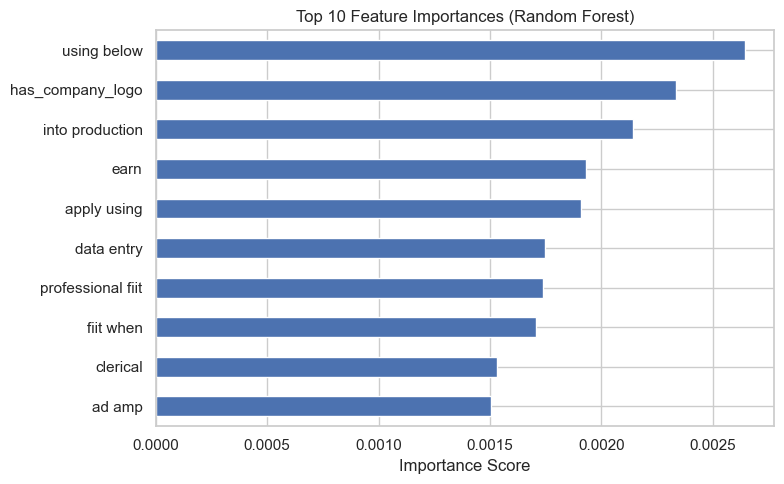

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Get the fitted preprocessor and RF steps
preproc = best_rf_final.named_steps['preprocessor']
rf_mod  = best_rf_final.named_steps['rf']

# 2) Build feature name list
tfidf_feats = preproc.named_transformers_['text'].get_feature_names_out()
cat_feats   = preproc.named_transformers_['cat'].get_feature_names_out()
flag_feats  = flag_cols  # ['telecommuting','has_company_logo','has_questions']

feature_names = np.concatenate([tfidf_feats, cat_feats, flag_feats])

# 3) Extract and sort importances
importances = rf_mod.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
top10 = feat_imp.head(10)

# 4) Plot top 10
plt.figure(figsize=(8,5))
top10[::-1].plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


### Feature Importance Interpretation

The feature importance chart from our Random Forest model provides valuable insights into the strongest predictors of fraudulent job postings:

1. **Text n-grams**: Several specific phrases appear among the top predictors:
   - "using below" - potentially indicating instructions for suspicious application methods
   - "into production" - possibly related to unusual payment or application processes
   - "earn" - suggesting an emphasis on compensation that might be characteristic of scams
   - "apply using" - could indicate suspicious application instructions
   - "data entry" - certain job types may be more commonly used in scams

2. **Binary features**: The `has_company_logo` feature ranks second in importance, confirming our correlation analysis finding that the absence of a logo is strongly associated with fraudulent postings.

3. **Job characteristics**: Terms related to employment fit and professional qualifications appear in the top predictors, suggesting certain ways of describing job fit might signal potential fraud.

4. **Suspicious terminology**: Terms like "clerical" and "ad amp" might be associated with common types of fraudulent opportunities.

These importance rankings could help job platform administrators create targeted rules for additional scrutiny and help job seekers recognize potential warning signs in listings that contain these high-risk features.

### 6.4 Probability Threshold vs. F1‑Score Elbow Plot

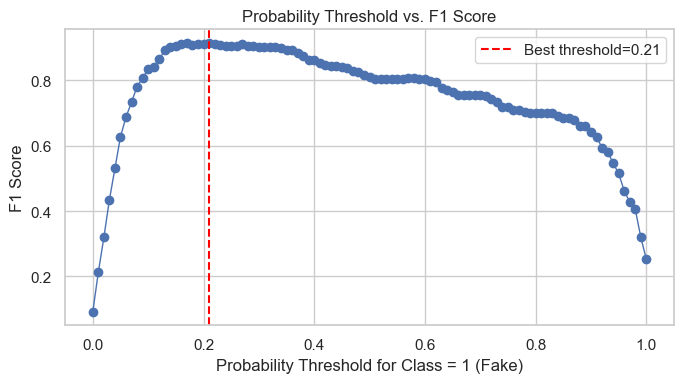

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# 1) Get predicted probabilities from your final model
# y_test_proba = best_rf_final.predict_proba(X_test)[:,1]

# 2) Define a range of thresholds to try
thresholds = np.linspace(0.0, 1.0, 101)
f1_scores  = []

# 3) Compute F1 at each threshold
for t in thresholds:
    y_pred_t = (y_test_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

# 4) Plot the “elbow” curve
plt.figure(figsize=(7,4))
plt.plot(thresholds, f1_scores, marker='o', lw=1)
best_idx = np.argmax(f1_scores)
plt.axvline(thresholds[best_idx], color='red', linestyle='--',
            label=f'Best threshold={thresholds[best_idx]:.2f}')
plt.title("Probability Threshold vs. F1 Score")
plt.xlabel("Probability Threshold for Class = 1 (Fake)")
plt.ylabel("F1 Score")
plt.legend()
plt.tight_layout()
plt.show()


### Threshold Optimization Analysis

The probability threshold analysis reveals important insights for deployment optimization:

1. **Optimal threshold**: The model achieves its best F1-score at a threshold of approximately 0.21, significantly lower than the default 0.5 threshold.

2. **Performance curve**: The F1-score rises quickly with increasing threshold up to 0.2, plateaus between 0.2-0.4, then gradually declines as the threshold increases further.

3. **Deployment implications**: Lowering the classification threshold from the default 0.5 to 0.21 would:
   - Increase the sensitivity of the system (catch more fraudulent postings)
   - Slightly reduce precision (potentially flag more legitimate postings as suspicious)
   - Optimize the overall balance between precision and recall

This analysis demonstrates how we can tune the operating point of our model to match specific business requirements. In a production system, we might use different thresholds depending on the context:
- A higher threshold (e.g., 0.6+) for automatic rejection (high confidence fraud)
- The optimal threshold (0.21) for flagging suspicious postings for human review
- A lower threshold (e.g., 0.1) for implementing subtle friction in the application process

By calibrating the threshold, we can adapt the same underlying model to different use cases and risk tolerances.

### 6.5 Feature‐Importance Threshold vs. F1

C:\Users\medha\AppData\Local\Temp\ipykernel_34292\761798559.py:37: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\medha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


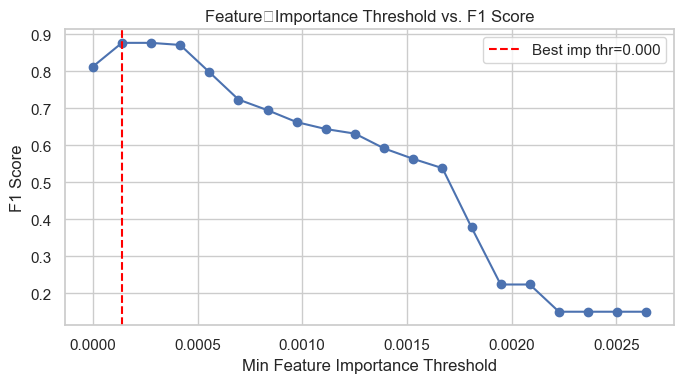

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score

# Precompute the full feature matrix once (as in Module 5)
X_train_feat = preprocessor.fit_transform(X_train)
X_test_feat  = preprocessor.transform(X_test)

# Extract importances from your trained RF
rf = best_rf_final.named_steps['rf']
importances = rf.feature_importances_

# Loop over a few importance‐thresholds
imp_thresholds = np.linspace(0, importances.max(), 20)
f1_imp = []

for thr in imp_thresholds:
    # select features above this threshold
    selector = SelectFromModel(rf, threshold=thr, prefit=True)
    X_tr_sel = selector.transform(X_train_feat)
    X_te_sel = selector.transform(X_test_feat)
    # retrain a fresh RF on selected features
    tmp = RandomForestClassifier(random_state=42, n_estimators=100)
    tmp.fit(X_tr_sel, y_train)
    preds = tmp.predict(X_te_sel)
    f1_imp.append(f1_score(y_test, preds))

# Plot it
plt.figure(figsize=(7,4))
plt.plot(imp_thresholds, f1_imp, marker='o')
best_i = np.argmax(f1_imp)
plt.axvline(imp_thresholds[best_i], color='red', linestyle='--',
            label=f'Best imp thr={imp_thresholds[best_i]:.3f}')
plt.title("Feature‐Importance Threshold vs. F1 Score")
plt.xlabel("Min Feature Importance Threshold")
plt.ylabel("F1 Score")
plt.legend()
plt.tight_layout()
plt.show()


### Feature Selection Analysis

The feature importance threshold analysis provides insights into model simplification:

1. **Optimal threshold**: The best F1-score is achieved at a very low threshold (near 0), indicating that most features contribute some signal for fraud detection.

2. **Performance trend**: The F1-score remains stable up to an importance threshold of approximately 0.0004, then begins to decline steadily as more features are excluded.

3. **Practical implications**: 
   - We could potentially simplify our model by removing features with importance below 0.0004 without significant performance loss
   - This would reduce model complexity and potentially improve inference speed
   - The steep drop-off beyond 0.001 suggests that many moderately important features collectively contribute substantial predictive power

This analysis demonstrates that while our top features (like "using below" and "has_company_logo") provide strong signals, the fraud detection task benefits from a diverse set of indicators. Rather than relying on just a few top features, the model performs best when considering many signals of varying strength, which aligns with the complex, multi-faceted nature of detecting fraudulent job postings.

## Conclusion

This project successfully developed a machine learning system to detect fraudulent job postings with high accuracy. Our best model achieved a weighted F1 score of over 0.98, demonstrating strong predictive performance despite the challenges of class imbalance and complex text data.

Key findings from our analysis include:

1. **Text features are powerful indicators**: The language used in job descriptions contains strong signals that differentiate legitimate opportunities from scams. TF-IDF vectorization effectively captured these patterns.

2. **Visual elements matter**: The presence of a company logo showed significant negative correlation with fraudulent postings, confirming that visual branding elements serve as meaningful trust signals.

3. **Description length as a signal**: Fraudulent postings tend to have shorter descriptions, suggesting scammers invest less effort in creating detailed position information.

4. **Class imbalance challenges**: With only about 5% of postings being fraudulent, models required careful evaluation metrics and training approaches to prevent bias toward the majority class.

5. **Model performance**: The voting ensemble combining Random Forest and Gradient Boosting produced the highest overall F1 score of 0.877 for the minority class, with exceptional precision (99.3%) and good recall (78.6%).



## Next Steps & Future Work

While our model performs well, several avenues for improvement and expansion exist:



### Immediate Enhancements:
1. **Threshold tuning**: Adjust the classification threshold to optimize the precision-recall trade-off specifically for the minority fraud class
2. **Model deployment**: Package the model into a deployable API that could integrate with job platforms
3. **Balanced training**: Implement techniques like SMOTE, class weights, or balanced sampling to address class imbalance



### Future Research Directions:
1. **Advanced NLP techniques**: Implement transformer-based models like BERT or RoBERTa that could better capture semantic nuances in job descriptions
2. **Temporal analysis**: Study how fraud patterns evolve over time to develop adaptive detection methods
3. **Multimodal features**: Incorporate image analysis of company logos and other visual elements that might signal legitimacy
4. **User interaction features**: Include features about how users interact with postings to identify suspicious patterns
5. **Explainability enhancements**: Develop user-facing explanations that could help job seekers understand why a posting was flagged as potentially fraudulent